<h1><center>Application of the trinomial pricing model:
profitability of an investment in the market</center></h1>

# by Dr. Long Teng

## Group number 5 

Rajat Kheni (220202938)(rajatkheni44@uni-Koblenz.de)

Varun Modi(221100512 )(varunmodi@uni-Koblenz.de)

Leela Prasad Gurugubelli  (221100436)(leelaprasad@uni-Koblenz.de) 

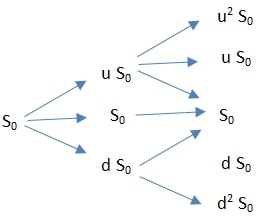

https://www.google.com/search?q=trinomial+model&tbm=isch&source=iu&ictx=1&vet=1&fir=OWWc9e9LyeGCOM%252CmKBuk64pmEfBXM%252C_%253BYNsuNGvyhTGhLM%252Cj6CPcUlbnwzXhM%252C_%253BIN5dx2RmBtUeqM%252C6m202FAd3XXS3M%252C_%253Be3Tt7QJLmzYO5M%252CmJ64us9bdqeY2M%252C_%253BQKpSP5qxQbLIlM%252CYOwIB-a0fqHx_M%252C_&usg=AI4_-kR8imq18p_qRA3b9utxTNwKLNKGsw&sa=X&ved=2ahUKEwiFlaz1tvT7AhU0hf0HHcYSDt0Q_h16BAhiEAE#imgrc=YNsuNGvyhTGhLM

In [2]:
import math
import numpy as np
import yfinance as yf
import pandas as pd

In [3]:
#1) defining a function to create up and down factors

def up_down_factors(sigma, d_t):
   
    u=math.exp(sigma*math.sqrt(2*d_t));
    d=math.exp(-sigma*math.sqrt(2*d_t));
    return u,d

In [4]:
#2) defining a function to calculate the probabilities in the trinomial model

def probability(r, sigma, d_t):
    
    p_d=((math.exp(sigma*math.sqrt(d_t/2))-math.exp(r*(d_t/2)))/
         (math.exp(sigma*math.sqrt(d_t/2))-math.exp(-sigma*math.sqrt(d_t/2))))**2
    p_u=((math.exp(r*(d_t/2))-math.exp(-sigma*math.sqrt(d_t/2)))/
         (math.exp(sigma*math.sqrt(d_t/2))-math.exp(-sigma*math.sqrt(d_t/2))))**2
    p_m=1-p_u-p_d;
   

    return p_u,p_d,p_m

In [5]:
# defining a function to calculate stock prices of the trinomial model after giving 
#some paramets( up and down factors and intial stockk price) as input to the model

def stock_price(S0, N, u, d):
    
    S = np.zeros((N*2+1,N+1))
    S[0,0]=S0
    for i in range(N*2+1):
        for j in range(0,N+1):
            if i==j:
                S[j,i]=S0
           
            elif i-j<=j: # d=1/u
                S[i,j]=(d**(i-j))*S0                         
    return S

In [6]:
# defining a function to calculate european call and put of the trinomial model using the three probabilities
# and other parameters as input

def priceTriEuro(N, K, r, S, p_u, p_d, p_m, d_t):
    
    
    C = np.zeros((2*N + 1, N + 1))
    P = np.zeros((2*N + 1, N + 1))
   
    for k in range(0, 2*N + 1):
        if S[k][N]-K <=0: # last column
            C[k][N]=0
        else:
            C[k][N] = S[k][N] - K
        if K-S[k][N]<=0:
            P[k][N]=0
        else:
            P[k][N] = K - S[k][N]
    #3)Backward (value) iteration for options
    for i in range(N-1, -1, -1):   
        for j in range(0,  i*2 + 1):
            C[j][i] = math.exp(-r*d_t) * (p_d*C[j+2][i+1] + p_m*C[j+1][i+1] + p_u*C[j][i+1])
            P[j][i] = math.exp(-r*d_t) * (p_d*P[j+2][i+1] + p_m*P[j+1][i+1] + p_u*P[j][i+1])
    return C, P



In [7]:
# defining a function to calculate american call and put of the trinomial model using the three probabilities
# and other parameters as input

def priceTriAmer(N, K, r, S, p_u, p_d, p_m, d_t, op_type):
    
    C = np.zeros((2*N + 1, N + 1))
    P = np.zeros((2*N + 1, N + 1))

   
    for k in range(0, 2*N + 1):
        if S[k][N]-K <=0:
            C[k][N]=0
        else:
            C[k][N] = S[k][N] - K
        if K-S[k][N]<=0:
            P[k][N]=0
        else:
            P[k][N] = K - S[k][N]
    # Backward (value) iteration for options
    for i in range(N-1, -1, -1):
        for j in range(0,  i*2 + 1):
            back_C = math.exp(-r*d_t) * (p_d*C[j+2][i+1] + p_m*C[j+1][i+1] + p_u*C[j][i+1])
            C[j][i] = max(S[j][i] - K, back_C)
            back_P = math.exp(-r*d_t) * (p_d*P[j+2][i+1] + p_m*P[j+1][i+1] + p_u*P[j][i+1])
            P[j][i] = max(K - S[j][i], back_P)
            
    if op_type == 'call':
        return C
    else:
        return P

### 2) Find the volatility of the S&P 100 index 

In [8]:
Cboe = pd.read_csv('CBOE OEX Implied Volatility Historical Data.csv')
Cboe.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,09/13/2019,14.01,14.40,14.53,13.67,NaN,-4.11%
1,09/12/2019,14.61,15.14,15.28,13.94,NaN,0.41%
2,09/11/2019,14.55,15.44,15.58,14.49,NaN,-5.15%
3,09/10/2019,15.34,16.89,16.89,15.24,NaN,1.12%
4,09/09/2019,15.17,15.21,16.13,14.83,NaN,-2.00%


### 3) Find the risk-free interest rate

In [9]:
interest_rate = pd.read_csv('FEDFUNDS.csv')
r = interest_rate['FEDFUNDS'][0]
print('risk-free interest rate = ', r)

risk-free interest rate =  2.13


### 4) Calculate the prices of the American options and Comparision of Option prices to the bid and ask prices

In [10]:
data = pd.read_csv('bb_options_20190815.csv')
data.head()

,UnderlyingSymbol,UnderlyingPrice,Flags,OptionSymbol,Blank,Type,Expiration,DataDate,Strike,Last,Bid,Ask,Volume,OpenInterest,T1OpenInterest
0,A,69.59,*,A190816C00042500,NaN,call,08/16/2019,08/15/2019,42.5,0.0,25.05,29.50,0,0,0
1,A,69.59,*,A190816P00042500,NaN,put,08/16/2019,08/15/2019,42.5,0.0,0.00,0.04,0,0,0
2,A,69.59,*,A190816C00045000,NaN,call,08/16/2019,08/15/2019,45.0,0.0,22.35,27.00,0,0,0
3,A,69.59,*,A190816P00045000,NaN,put,08/16/2019,08/15/2019,45.0,0.0,0.00,0.04,0,0,0
4,A,69.59,*,A190816C00047500,NaN,call,08/16/2019,08/15/2019,47.5,0.0,19.85,24.40,0,0,0


In [48]:
def CalAmericanOpt(table):
    dataframe = table
    price = []
    for index, row in dataframe.iterrows():
        N = 1000
        r = 0.0213
        T = 29/365
        d_t = T/N
        sigma = 0.2411
        K = row['Strike']                #set parameter
        S0 = row['UnderlyingPrice']
        u, d = up_down_factors(sigma, d_t)
        p_u, p_d, p_m = probability(r, sigma, d_t)
        S=stock_price(S0, N, u, d)
        Option = priceTriAmer(N, K, r, S, p_u, p_d, p_m, d_t, op_type = row['Type'])
        Op = Option[0][0]
        price.append(Op)
    return price

In [49]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,6)

In [50]:
Strick1 = data[(data.Strike == 1145) & (data['Expiration'] == '09/13/2019') & (data.UnderlyingSymbol == 'OEX')].reset_index()
Strick1

,index,UnderlyingSymbol,UnderlyingPrice,Flags,OptionSymbol,Blank,Type,Expiration,DataDate,Strike,Last,Bid,Ask,Volume,OpenInterest,T1OpenInterest
0,565295,OEX,1256.82,*,OEX190913C01145000,NaN,call,09/13/2019,08/15/2019,1145.0,0.0,116.5,121.6,0,0,0
1,565296,OEX,1256.82,*,OEX190913P01145000,NaN,put,09/13/2019,08/15/2019,1145.0,0.0,3.6,5.8,0,0,0


In [51]:
price1 = CalAmericanOpt(Strick1)

In [52]:
df1 = pd.DataFrame(price1, columns=['Option Price'])
df1 = pd.concat([Strick1[['UnderlyingSymbol', 'UnderlyingPrice', 'Type', 'Expiration', 'Strike', 'Bid', 'Ask']], df1], axis=1)
df1

,UnderlyingSymbol,UnderlyingPrice,Type,Expiration,Strike,Bid,Ask,Option Price
0,OEX,1256.82,call,09/13/2019,1145.0,116.5,121.6,116.768300
1,OEX,1256.82,put,09/13/2019,1145.0,3.6,5.8,3.018849


In [53]:
Strick2 = data[(data.Strike == 1150) & (data['Expiration'] == '09/13/2019') & (data.UnderlyingSymbol == 'OEX')].reset_index()
Strick2

,index,UnderlyingSymbol,UnderlyingPrice,Flags,OptionSymbol,Blank,Type,Expiration,DataDate,Strike,Last,Bid,Ask,Volume,OpenInterest,T1OpenInterest
0,565297,OEX,1256.82,*,OEX190913C01150000,NaN,call,09/13/2019,08/15/2019,1150.0,0.0,111.9,117.0,0,0,0
1,565298,OEX,1256.82,*,OEX190913P01150000,NaN,put,09/13/2019,08/15/2019,1150.0,0.0,4.0,6.2,0,0,0


In [54]:
price2 = CalAmericanOpt(Strick2)
df2 = pd.DataFrame(price2, columns=['Option Price'])
df2 = pd.concat([Strick2[['UnderlyingSymbol', 'UnderlyingPrice', 'Type', 'Expiration', 'Strike', 'Bid', 'Ask']], df2], axis=1)
df2

,UnderlyingSymbol,UnderlyingPrice,Type,Expiration,Strike,Bid,Ask,Option Price
0,OEX,1256.82,call,09/13/2019,1150.0,111.9,117.0,112.234406
1,OEX,1256.82,put,09/13/2019,1150.0,4.0,6.2,3.477667


In [55]:
Strick3 = data[(data.Strike == 1200) & (data['Expiration'] == '09/13/2019') & (data.UnderlyingSymbol == 'OEX')].reset_index()
Strick3

,index,UnderlyingSymbol,UnderlyingPrice,Flags,OptionSymbol,Blank,Type,Expiration,DataDate,Strike,Last,Bid,Ask,Volume,OpenInterest,T1OpenInterest
0,565317,OEX,1256.82,*,OEX190913C01200000,NaN,call,09/13/2019,08/15/2019,1200.0,0.0,69.1,73.6,0,0,0
1,565318,OEX,1256.82,*,OEX190913P01200000,NaN,put,09/13/2019,08/15/2019,1200.0,0.0,10.5,13.6,0,0,0


In [56]:
price3 = CalAmericanOpt(Strick3)
df3 = pd.DataFrame(price3, columns=['Option Price'])
df3 = pd.concat([Strick3[['UnderlyingSymbol', 'UnderlyingPrice', 'Type', 'Expiration', 'Strike', 'Bid', 'Ask']], df3], axis=1)
df3

,UnderlyingSymbol,UnderlyingPrice,Type,Expiration,Strike,Bid,Ask,Option Price
0,OEX,1256.82,call,09/13/2019,1200.0,69.1,73.6,70.646987
1,OEX,1256.82,put,09/13/2019,1200.0,10.5,13.6,11.831511


In [57]:
Strick4 = data[(data.Strike == 1250) & (data['Expiration'] == '09/13/2019') & (data.UnderlyingSymbol == 'OEX')].reset_index()
Strick4

,index,UnderlyingSymbol,UnderlyingPrice,Flags,OptionSymbol,Blank,Type,Expiration,DataDate,Strike,Last,Bid,Ask,Volume,OpenInterest,T1OpenInterest
0,565337,OEX,1256.82,*,OEX190913C01250000,NaN,call,09/13/2019,08/15/2019,1250.0,0.0,32.1,35.8,0,0,0
1,565338,OEX,1256.82,*,OEX190913P01250000,NaN,put,09/13/2019,08/15/2019,1250.0,0.0,23.9,27.2,0,0,0


In [58]:
price4 = CalAmericanOpt(Strick4)
df4 = pd.DataFrame(price4, columns=['Option Price'])
df4 = pd.concat([Strick4[['UnderlyingSymbol', 'UnderlyingPrice', 'Type', 'Expiration', 'Strike', 'Bid', 'Ask']], df4], axis=1)
df4

,UnderlyingSymbol,UnderlyingPrice,Type,Expiration,Strike,Bid,Ask,Option Price
0,OEX,1256.82,call,09/13/2019,1250.0,32.1,35.8,38.602087
1,OEX,1256.82,put,09/13/2019,1250.0,23.9,27.2,29.776855


In [59]:
Strick5 = data[(data.Strike == 1300) & (data['Expiration'] == '09/13/2019') & (data.UnderlyingSymbol == 'OEX')].reset_index()
Strick5

,index,UnderlyingSymbol,UnderlyingPrice,Flags,OptionSymbol,Blank,Type,Expiration,DataDate,Strike,Last,Bid,Ask,Volume,OpenInterest,T1OpenInterest
0,565357,OEX,1256.82,*,OEX190913C01300000,NaN,call,09/13/2019,08/15/2019,1300.0,0.0,6.8,9.0,0,0,0
1,565358,OEX,1256.82,*,OEX190913P01300000,NaN,put,09/13/2019,08/15/2019,1300.0,0.0,49.2,53.2,0,0,0


In [60]:
price5 = CalAmericanOpt(Strick5)
df5 = pd.DataFrame(price5, columns=['Option Price'])
df5 = pd.concat([Strick5[['UnderlyingSymbol', 'UnderlyingPrice', 'Type', 'Expiration', 'Strike', 'Bid', 'Ask']], df5], axis=1)
df5

,UnderlyingSymbol,UnderlyingPrice,Type,Expiration,Strike,Bid,Ask,Option Price
0,OEX,1256.82,call,09/13/2019,1300.0,6.8,9.0,17.918932
1,OEX,1256.82,put,09/13/2019,1300.0,49.2,53.2,59.177696


In [61]:
Strick6 = data[(data.Strike == 1350) & (data['Expiration'] == '09/13/2019') & (data.UnderlyingSymbol == 'OEX')].reset_index()
Strick6

,index,UnderlyingSymbol,UnderlyingPrice,Flags,OptionSymbol,Blank,Type,Expiration,DataDate,Strike,Last,Bid,Ask,Volume,OpenInterest,T1OpenInterest
0,565377,OEX,1256.82,*,OEX190913C01350000,NaN,call,09/13/2019,08/15/2019,1350.0,0.9,0.15,0.9,0,5,5
1,565378,OEX,1256.82,*,OEX190913P01350000,NaN,put,09/13/2019,08/15/2019,1350.0,0.0,93.70,96.1,0,0,0


In [62]:
price6 = CalAmericanOpt(Strick6)
df6 = pd.DataFrame(price6, columns=['Option Price'])
df6 = pd.concat([Strick6[['UnderlyingSymbol', 'UnderlyingPrice', 'Type', 'Expiration', 'Strike', 'Bid', 'Ask']], df6], axis=1)
df6

,UnderlyingSymbol,UnderlyingPrice,Type,Expiration,Strike,Bid,Ask,Option Price
0,OEX,1256.82,call,09/13/2019,1350.0,0.15,0.9,6.990314
1,OEX,1256.82,put,09/13/2019,1350.0,93.70,96.1,98.477198


In [63]:
def comparison_graph(tabel):
    call = tabel.groupby("Type").get_group('call')
    put = tabel.groupby("Type").get_group('put')
    
    # Initialise the subplot function using number of rows and columns
    plt.subplots(1, 1)

    plt.plot(call.Strike, call.Bid, c = 'r', marker='o', label="Bid")
    plt.plot(call.Strike, call.Ask, c = 'b', marker='^', label="Ask")
    plt.plot(call.Strike, call['Option Price'], c = 'y',marker='*', label="Option Price")
    plt.title('Call')
    plt.legend()
    plt.grid()
    
    plt.subplots(1, 1)
    plt.plot(put.Strike, put.Bid, c = 'r', marker='o', label="Bid")
    plt.plot(put.Strike, put.Ask, c = 'b', marker='^', label="Ask")
    plt.plot(put.Strike, put['Option Price'], c = 'y',marker='*', label='Option Price')
    plt.title('Put')
    plt.legend()
    plt.grid()

In [64]:
Stricks = [df1, df2, df3, df4, df5, df6]
all_data = pd.concat(Stricks).reset_index()
all_data.drop(columns=['index'])

,UnderlyingSymbol,UnderlyingPrice,Type,Expiration,Strike,Bid,Ask,Option Price
0,OEX,1256.82,call,09/13/2019,1145.0,116.50,121.6,116.768300
1,OEX,1256.82,put,09/13/2019,1145.0,3.60,5.8,3.018849
2,OEX,1256.82,call,09/13/2019,1150.0,111.90,117.0,112.234406
3,OEX,1256.82,put,09/13/2019,1150.0,4.00,6.2,3.477667
4,OEX,1256.82,call,09/13/2019,1200.0,69.10,73.6,70.646987
5,OEX,1256.82,put,09/13/2019,1200.0,10.50,13.6,11.831511
6,OEX,1256.82,call,09/13/2019,1250.0,32.10,35.8,38.602087
7,OEX,1256.82,put,09/13/2019,1250.0,23.90,27.2,29.776855
8,OEX,1256.82,call,09/13/2019,1300.0,6.80,9.0,17.918932
9,OEX,1256.82,put,09/13/2019,1300.0,49.20,53.2,59.177696


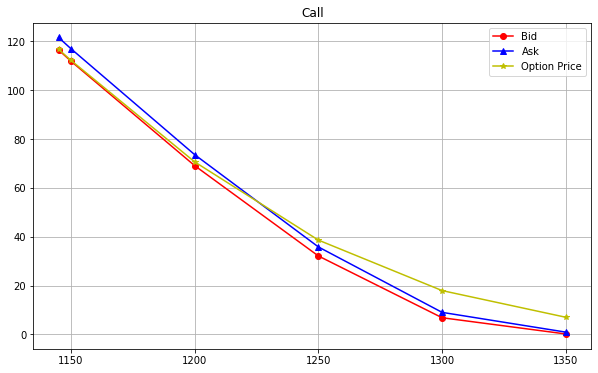

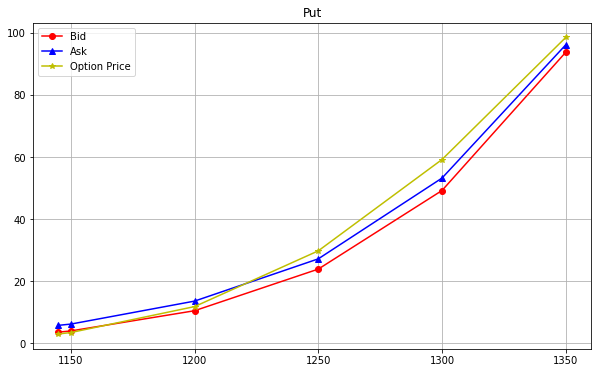

In [65]:
comparison_graph(all_data)

### 5) how much will you gain by exercising all the options on Sep. 13, 2019.

In [29]:
def PayOffs(tabel, value):  #value on 13th september
    dataframe = tabel
    pay_offs = []
    for index, row in dataframe.iterrows():
        type_ = row['Type']
        ST = value
        Strike = row['Strike']
        if type_ == 'call':
            pay_offs.append(max(0, ST - Strike))
        else:
            pay_offs.append(max(0, Strike - ST))
    return pay_offs

In [30]:
SP1 = PayOffs(Strick1, 1330.97)
dfs1 = df1.copy()
dfs1['S&P 100 payoff'] = SP1
dfs1['Profit'] = dfs1['S&P 100 payoff'] - dfs1['Ask']
dfs1

,UnderlyingSymbol,UnderlyingPrice,Type,Expiration,Strike,Bid,Ask,Option Price,S&P 100 payoff,Profit
0,OEX,1256.82,call,09/13/2019,1145.0,116.5,121.6,116.770034,185.97,64.37
1,OEX,1256.82,put,09/13/2019,1145.0,3.6,5.8,3.020954,0.00,-5.80


In [31]:
SP2 = PayOffs(Strick2, 1330.97)
dfs2 = df2.copy()
dfs2['S&P 100 payoff'] = SP2
dfs2['Profit'] = dfs2['S&P 100 payoff'] - dfs2['Ask']
dfs2

,UnderlyingSymbol,UnderlyingPrice,Type,Expiration,Strike,Bid,Ask,Option Price,S&P 100 payoff,Profit
0,OEX,1256.82,call,09/13/2019,1150.0,111.9,117.0,112.232517,180.97,63.97
1,OEX,1256.82,put,09/13/2019,1150.0,4.0,6.2,3.475806,0.00,-6.20


In [32]:
SP3 = PayOffs(Strick3, 1330.97)
dfs3 = df3.copy()
dfs3['S&P 100 payoff'] = SP3
dfs3['Profit'] = dfs3['S&P 100 payoff'] - dfs3['Ask']
dfs3

,UnderlyingSymbol,UnderlyingPrice,Type,Expiration,Strike,Bid,Ask,Option Price,S&P 100 payoff,Profit
0,OEX,1256.82,call,09/13/2019,1200.0,69.1,73.6,70.649306,130.97,57.37
1,OEX,1256.82,put,09/13/2019,1200.0,10.5,13.6,11.835472,0.00,-13.60


In [33]:
SP4 = PayOffs(Strick4, 1330.97)
dfs4 = df4.copy()
dfs4['S&P 100 payoff'] = SP4
dfs4['Profit'] = dfs4['S&P 100 payoff'] - dfs4['Ask']
dfs4

,UnderlyingSymbol,UnderlyingPrice,Type,Expiration,Strike,Bid,Ask,Option Price,S&P 100 payoff,Profit
0,OEX,1256.82,call,09/13/2019,1250.0,32.1,35.8,38.641425,80.97,45.17
1,OEX,1256.82,put,09/13/2019,1250.0,23.9,27.2,29.817077,0.00,-27.20


In [34]:
SP5 = PayOffs(Strick5, 1330.97)
dfs5 = df5.copy()
dfs5['S&P 100 payoff'] = SP5
dfs5['Profit'] = dfs5['S&P 100 payoff'] - dfs5['Ask']
dfs5

,UnderlyingSymbol,UnderlyingPrice,Type,Expiration,Strike,Bid,Ask,Option Price,S&P 100 payoff,Profit
0,OEX,1256.82,call,09/13/2019,1300.0,6.8,9.0,17.955201,30.97,21.97
1,OEX,1256.82,put,09/13/2019,1300.0,49.2,53.2,59.214133,0.00,-53.20


In [35]:
SP6 = PayOffs(Strick6, 1330.97)
dfs6 = df6.copy()
dfs6['S&P 100 payoff'] = SP6
dfs6['Profit'] = dfs6['S&P 100 payoff'] - dfs6['Ask']
dfs6

,UnderlyingSymbol,UnderlyingPrice,Type,Expiration,Strike,Bid,Ask,Option Price,S&P 100 payoff,Profit
0,OEX,1256.82,call,09/13/2019,1350.0,0.15,0.9,7.003677,0.00,-0.90
1,OEX,1256.82,put,09/13/2019,1350.0,93.70,96.1,98.490894,19.03,-77.07


In [66]:
Stricks = [dfs1, dfs2, dfs3, dfs4, dfs5, dfs6]
profits = pd.concat(Stricks).reset_index()
profits.drop(columns=['index'])

,UnderlyingSymbol,UnderlyingPrice,Type,Expiration,Strike,Bid,Ask,Option Price,S&P 100 payoff,Profit
0,OEX,1256.82,call,09/13/2019,1145.0,116.50,121.6,116.770034,185.97,64.37
1,OEX,1256.82,put,09/13/2019,1145.0,3.60,5.8,3.020954,0.00,-5.80
2,OEX,1256.82,call,09/13/2019,1150.0,111.90,117.0,112.232517,180.97,63.97
3,OEX,1256.82,put,09/13/2019,1150.0,4.00,6.2,3.475806,0.00,-6.20
4,OEX,1256.82,call,09/13/2019,1200.0,69.10,73.6,70.649306,130.97,57.37
5,OEX,1256.82,put,09/13/2019,1200.0,10.50,13.6,11.835472,0.00,-13.60
6,OEX,1256.82,call,09/13/2019,1250.0,32.10,35.8,38.641425,80.97,45.17
7,OEX,1256.82,put,09/13/2019,1250.0,23.90,27.2,29.817077,0.00,-27.20
8,OEX,1256.82,call,09/13/2019,1300.0,6.80,9.0,17.955201,30.97,21.97
9,OEX,1256.82,put,09/13/2019,1300.0,49.20,53.2,59.214133,0.00,-53.20


In [37]:
profit = profits['Profit'].sum()
print('Profit from all Stricks is = ', profit)

Profit from all Stricks is =  68.88000000000011


In [38]:
call_profit = profits[(profits.Type == 'call')]['Profit'].sum()
call_ask_price = profits[(profits.Type == 'call')]['Ask'].sum()
put_profit = profits[(profits.Type == 'put')]['Profit'].sum()
put_ask_price = profits[(profits.Type == 'put')]['Ask'].sum()

print('Total paid ask price for call Option is = ', call_ask_price)
print('Total profit from call Option is = ', call_profit)
print('Total paid ask price for put Option is = ', put_ask_price)
print('Total profit from put Option is = ', put_profit)

Total paid ask price for call Option is =  357.9
Total profit from call Option is =  251.95000000000013
Total paid ask price for put Option is =  202.1
Total profit from put Option is =  -183.07000000000002
